In [24]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

torch.set_printoptions(precision=3, sci_mode=False)
np.set_printoptions(precision=3, suppress=True)

In [25]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

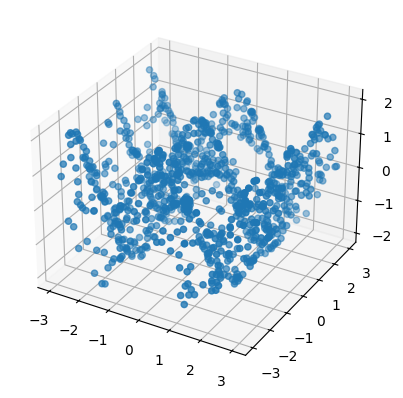

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [27]:
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [28]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
    train_losses = np.zeros(epochs)

    for it in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        loss.backward()
        optimizer.step()

        train_losses[it] = loss.item()

        if (it + 1) % 10 == 0:
            print(f'Epoch {it+1}/{epochs}, Loss: {loss.item()}')

    return train_losses

Epoch 10/1000, Loss: 1.0154459476470947
Epoch 20/1000, Loss: 0.9202468991279602
Epoch 30/1000, Loss: 0.8453415632247925
Epoch 40/1000, Loss: 0.7480418086051941
Epoch 50/1000, Loss: 0.6331170797348022
Epoch 60/1000, Loss: 0.5202217698097229
Epoch 70/1000, Loss: 0.4310770630836487
Epoch 80/1000, Loss: 0.37313181161880493
Epoch 90/1000, Loss: 0.33248791098594666
Epoch 100/1000, Loss: 0.2983567714691162
Epoch 110/1000, Loss: 0.2683974504470825
Epoch 120/1000, Loss: 0.2413758933544159
Epoch 130/1000, Loss: 0.21575812995433807
Epoch 140/1000, Loss: 0.19376128911972046
Epoch 150/1000, Loss: 0.17588382959365845
Epoch 160/1000, Loss: 0.1563250571489334
Epoch 170/1000, Loss: 0.14031627774238586
Epoch 180/1000, Loss: 0.126621812582016
Epoch 190/1000, Loss: 0.10386072099208832
Epoch 200/1000, Loss: 0.08524765074253082
Epoch 210/1000, Loss: 0.06928669661283493
Epoch 220/1000, Loss: 0.053686462342739105
Epoch 230/1000, Loss: 0.04463038593530655
Epoch 240/1000, Loss: 0.029842756688594818
Epoch 250/10

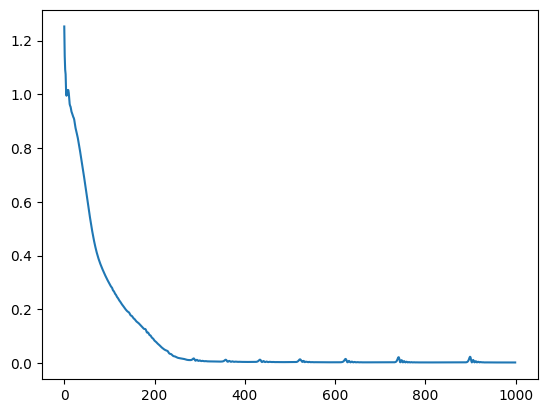

In [30]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train, 1000)

plt.plot(train_losses)

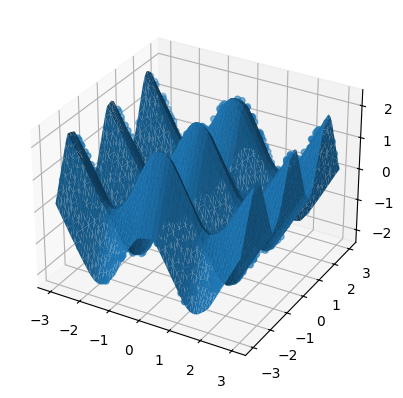

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()

    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()